# Analysing a PPG signal

This notebook is aimed at those with no knowledge of HeartPy. It
contains a few simple examples of the API available.

In this notebook we’ll go over how to analyse a regular PPG signal with
HeartPy.

For this we’ll use the example datasets that are packaged with HeartPy.

In [1]:
#First let's import
import heartpy as hp
import matplotlib.pyplot as plt

HeartPy comes with a function ***load_exampledata()*** that can load the
datasets provded. It will return a tuple (data, timer), where ‘timer’ is
the timer column (ms or datetime). If no timer column is available a
tuple is still returned, but with timer array being empty.

There’s three datasets included with HeartPy: - 0 : a short, very clean
PPG signal, sampled at 100.0 Hz - 1 : a slightly longer (~2 minute) PPG
signal, with missing signal in first third, and random noise spikes in
rest of signal - 2 : a long (~11.5 minute) PPG signal recorded ‘in the
wild’ while driving in a driving simulator using a Pulse Sensor on the
index finger and an Arduino

------------------------------------------------------------------------

Let’s go through all three examples and run an analysis for each.

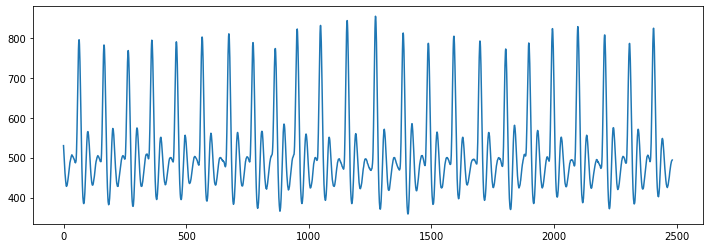

In [2]:
#first let's load the clean PPG signal
data, timer = hp.load_exampledata(0)

#and visualise
plt.figure(figsize=(12,4))
plt.plot(data)
plt.show()

#### That is a beautiful signal. Analysis should pose no issue

when running ***hp.process()***, two dicts are returned: working_data
(containing working data that you may want to access nonetheless, like
peak positions and peak-peak intervals), and measures (containing the
computed output measures).

In the docs we abbreviate these to **‘wd’** and **‘m’**

In [3]:
#run the analysis
wd, m = hp.process(data, sample_rate = 100.0)

#### Now you may want to visualize the results of the analysis.

Heartpy comes with a function ***hp.plotter(wd, m)*** that does just
this. The function requires you to give it the working_data and measures
dict.

If you specify parameters like a figure size to matplotlib before
calling ***hp.plotter(wd, m)***, the specified figure size will be used.

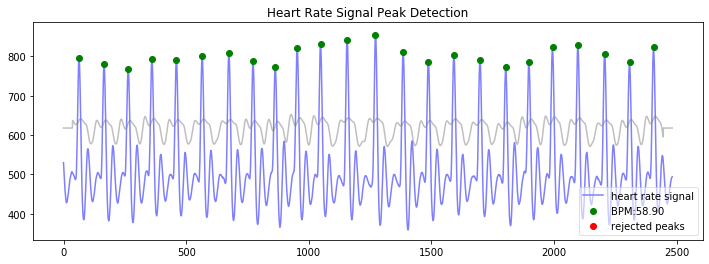

bpm: 58.898848
ibi: 1018.695652
sdnn: 65.760061
sdsd: 34.866925
rmssd: 64.737231
pnn20: 0.863636
pnn50: 0.409091
hr_mad: 40.000000
sd1: 45.758077
sd2: 82.926832
s: 11921.000816
sd1/sd2: 0.551789
breathingrate: 0.161095

In [4]:
#set large figure
plt.figure(figsize=(12,4))

#call plotter
hp.plotter(wd, m)

#display measures computed
for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))

That looks nice, and we ran into no problems.

------------------------------------------------------------------------

Let’s move on to the second included dataset and explore it first:

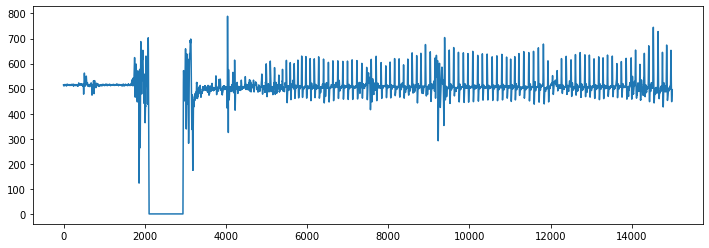

In [5]:
data, timer = hp.load_exampledata(1)

plt.figure(figsize=(12,4))
plt.plot(data)
plt.show()

This is a more tricky signal I made intentionally. There’s no signal in
the beginning as I started recording before and while putting on the
sensor. After the signal commences there’s a few noise spikes as I
forcefully moved the sensor while recording. This imitates what may
happen when recording ‘in the wild’ as well if the participant moves and
accidentally tugs at a sensor cable.

HeartPy is designed to handle this sort of thing out of the box. Let’s
look at the example first:

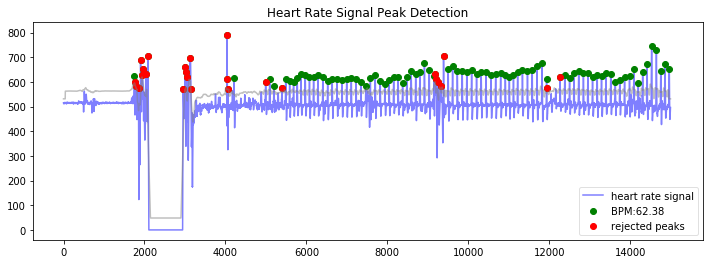

bpm: 62.376304
ibi: 961.903744
sdnn: 64.613519
sdsd: 29.871930
rmssd: 57.069746
pnn20: 0.797297
pnn50: 0.486486
hr_mad: 47.010333
sd1: 40.344402
sd2: 81.621935
s: 10345.227446
sd1/sd2: 0.494284
breathingrate: 0.155994

In [6]:
sample_rate = hp.get_samplerate_mstimer(timer)

wd, m = hp.process(data, sample_rate)

#plot
plt.figure(figsize=(12,4))
hp.plotter(wd, m)

#display measures computed
for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))

Note we computed the sample_rate from a timer column (that was in ms
values). This is important beforehand since we didn’t know with what
sample_rate the signal was sampled. All measures depend on knowing the
sample rate.

HeartPy comes with two functions: ***hp.get_samplerate_mstimer()*** that
computes sample rate based on a ms-timer, and
***hp.get_samplerate_datetime()***, that computes sample_rate based on a
column in datetime values.

You saw how we used the mstimer earlier, now let’s look at a ‘in the
wild’ recording that uses datetime strings to encode time:

In [7]:
data, timer = hp.load_exampledata(2)

print(timer[0])

2016-11-24 13:58:58.081000

When computing the sample rate we need to give
***get_samplerate_datetime()*** the format of the string (by default it
expects HH:MM:SS.ms):

In [8]:
sample_rate = hp.get_samplerate_datetime(timer, timeformat='%Y-%m-%d %H:%M:%S.%f')

print('sample rate is: %f Hz' %sample_rate)

sample rate is: 100.419711 Hz

Now that we know all that, running the analysis is the same as before:


Finished in 0.248689 sec
bpm: 97.325149
ibi: 616.490194
sdnn: 57.916589
sdsd: 30.173744
rmssd: 38.181375
pnn20: 0.320281
pnn50: 0.086345
hr_mad: 29.874613
sd1: 26.997110
sd2: 75.178572
s: 6376.189507
sd1/sd2: 0.359106
breathingrate: 0.258103

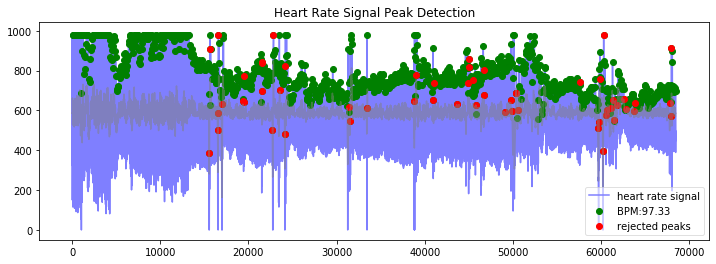

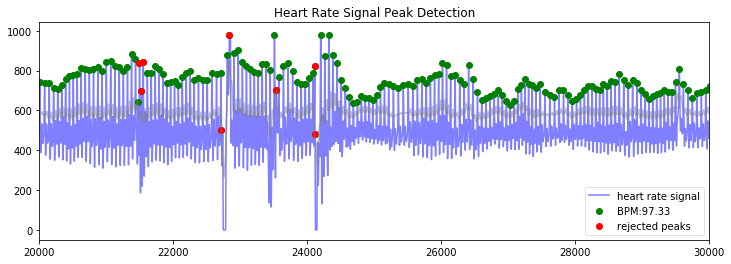

In [9]:
wd, m = hp.process(data, sample_rate, report_time = True)

#plot
plt.figure(figsize=(12,4))
hp.plotter(wd, m)

#let's zoom in on a bit
plt.figure(figsize=(12,4))
plt.xlim(20000, 30000)
hp.plotter(wd, m)

#display measures computed
for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))

### Well that looks just swell!

Now you know how to use HeartPy to analyse basic PPG signals.

Take a look at some of the other notebooks to see how to handle lower
quality signals that come from various wearables (smartwatch, smart
ring), as well as how to handle (noisy) ECG signals!